### **Содержание**
* [Информация о проекте | Описание данных](#chapter0)
* [Шаг 1. Загрузка данных](#chapter1)
    * 1.1 Загрузка данных и библиотек.
    * 1.2 Общая информация о данных и структуре.
    * 1.3 Вывод.
* [Шаг 2. Предобработка данных](#chapter2)
    * 2.1 Приведем столбец date к типу даты pandas.
    * 2.2 Создадим новый столбец с номером месяца на основе столбца date.
    * 2.3 Проверим наличие пропущенных значений и дубликатов в датафреймах. Обработаем их, если такие значения присутствуют.
    * 2.4 Вывод.
* [Шаг 3. Исследовательский анализ данных](#chapter3) 
    * 3.1 Опишим и визуализируем общую информацию о пользователях и поездках: частота встречаемости городов;
    * 3.2 соотношение пользователей с подпиской и без подписки;
    * 3.3 возраст пользователей;
    * 3.4 расстояние, которое пользователь преодолел за одну поездку;
    * 3.5 продолжительность поездок.
    * 3.6 Вывод.
* [Шаг 4. Объединение данных](#chapter4)
    * 4.1 Объединим данные о пользователях, поездках и подписках в один датафрейм.
    * 4.2 Создадим ещё два датафрейма из датафрейма, созданного на этапе 4.1: 
        * c данными о пользователях без подписки;
        * с данными о пользователях с подпиской.
    * 4.3 Визуализируем информацию о расстоянии и времени поездок для пользователей обеих категорий.
* [Шаг 5. Подсчет выручки](#chapter5)
    * 5.1 Создадим датафрейм с агрегированными данными о поездках на основе датафрейма с объединёнными данными из шага 4.
    * 5.2 В этот же датафрейм добавим столбец с помесячной выручкой, которую принёс каждый пользователь. 
* [Шаг 6. Проверка гипотез](#chapter6)
    * 6.1 Важно понять, тратят ли пользователи с подпиской больше времени на поездки? 
    * 6.2 Можно ли сказать, что среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров? Провим гипотезу и сделайте выводы.
    * 6.3 Проверим гипотезу о том, будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки.
    * 6.4 Техническая команда сервиса обновила сервера, с которыми взаимодействует мобильное приложение. Она надеется, что из-за этого количество обращений в техподдержку значимо снизилось. Найдем тест, который бы нам понадобился для проверки этой гипотезы.
* [Шаг 6. Общий Вывод](#chapter7)

## Описание проекта
Вы аналитик популярного сервиса аренды самокатов GoFast. \
Вам передали данные о некоторых пользователях из нескольких городов, а также об их поездках. Проанализируйте данные и проверьте некоторые гипотезы, которые могут помочь бизнесу вырасти. \
Чтобы совершать поездки по городу, пользователи сервиса GoFast пользуются мобильным приложением. \
Сервисом можно пользоваться:
* без подписки абонентская плата отсутствует;
    * стоимость одной минуты поездки — 8 рублей;
    * сстоимость старта (начала поездки) — 50 рублей;
* с подпиской Ultra абонентская плата — 199 рублей в месяц;
    * стоимость одной минуты поездки — 6 рублей;
    * стоимость старта — бесплатно.

## Описание данных
* **Пользователи** — *users_go.csv*
   * `user_id` — уникальный идентификатор пользователя
   * `name` — имя пользователя
   * `age` — возраст
   * `city` — город
   * `subscription_type` — тип подписки (free, ultra)
 \
* **Поeздки** — *rides_go.csv*
   * `user_id` — уникальный идентификатор пользователя
   * `distance` — расстояние, которое пользователь проехал в текущей сессии (в метрах)
   * `duration` — продолжительность сессии (в минутах) — время с того момента, как пользователь нажал кнопку «Начать поездку» до момента, как он нажал кнопку «Завершить поездку»
   * `date` — дата совершения поездки
 \
* **Подписки** — *subscriptions_go.csv*
   * `subscription_type` — тип подписки
   * `minute_price` — стоимость одной минуты поездки по данной подписке
   * `start_ride_price` — стоимость начала поездки
   * `subscription_fee` — стоимость ежемесячного платежа

## Шаг 1. Загрузка данных

### 1.1 Загружаем и настраиваем библиотеки

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import numpy as np
from scipy import stats as st
from IPython.display import display
pd.options.display.max_columns = 25
pd.options.display.float_format = '{:,.2f}'.format

#### 1.1.1 Загружаем данные

##### Датасет с информацией о пользователях

In [3]:
try:
    data_users = pd.read_csv('/datasets/users_go.csv')
except:
    data_users = pd.read_csv('https://code.s3.yandex.net/datasets/users_go.csv')

##### Датасет с информацией о поездках

In [4]:
try:
    data_riders = pd.read_csv('/datasets/rides_go.csv')
except:
    data_riders = pd.read_csv('https://code.s3.yandex.net/datasets/rides_go.csv')

##### Датасет с информацией о подписках

In [5]:
try:
    data_sub = pd.read_csv('/datasets/subscriptions_go.csv')
except:
    data_sub = pd.read_csv('https://code.s3.yandex.net/datasets/subscriptions_go.csv')

### 1.2 Структура данных
#### 1.2.1 Данные о пользователях

In [6]:
data_users.info()
print(data_users.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1565 non-null   int64 
 1   name               1565 non-null   object
 2   age                1565 non-null   int64 
 3   city               1565 non-null   object
 4   subscription_type  1565 non-null   object
dtypes: int64(2), object(3)
memory usage: 61.3+ KB
(1565, 5)


In [7]:
data_users.sample(10)

,user_id,name,age,city,subscription_type
481,482,Ясмина,22,Пятигорск,ultra
1354,1355,Владислава,29,Ростов-на-Дону,free
1452,1453,Виолетта,26,Екатеринбург,free
468,469,Майя,24,Сочи,ultra
1122,1123,Матвей,25,Краснодар,free
866,867,Леонид,24,Ростов-на-Дону,free
76,77,Анна,23,Пятигорск,ultra
667,668,Андрей,25,Ростов-на-Дону,ultra
1257,1258,Антон,18,Омск,free
360,361,Анастасия,28,Краснодар,ultra


##### Проверим распределение пользователей по возрасту - столбец `age`

In [8]:
print('Максимальный возраст пользователя', data_users['age'].max(), 'года')

print('Минимальный возраст пользователя', data_users['age'].min(), 'лет')

Максимальный возраст пользователя 43 года
Минимальный возраст пользователя 12 лет


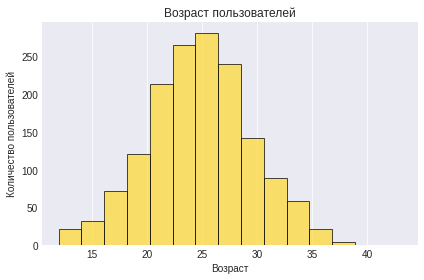

In [9]:
plt.style.use('seaborn-darkgrid')  # выбор стиля
palette = plt.get_cmap('Set2')  # выбор цветовой палитры

plt.hist(data_users['age'], bins=15, color=palette(5), edgecolor="k", alpha=0.7)  # добавляем цвет и границы бинов
plt.title('Возраст пользователей')
plt.xlabel('Возраст')
plt.ylabel('Количество пользователей')
plt.grid(axis='y')  # сетка только по вертикали
plt.tight_layout()  # автоматическая настройка размера и расположения элементов на фигуре

plt.show()

##### Проверим распределение пользователей по городам - столбец `city`

In [10]:
print("Кол-во пользователей в каждом городе:")
print(data_users['city'].value_counts())

Кол-во пользователей в каждом городе:
Пятигорск         226
Екатеринбург      206
Ростов-на-Дону    202
Краснодар         196
Сочи              192
Омск              186
Тюмень            185
Москва            172
Name: city, dtype: int64


<AxesSubplot:title={'center':'Распределение пользователей по городам'}, ylabel='city'>

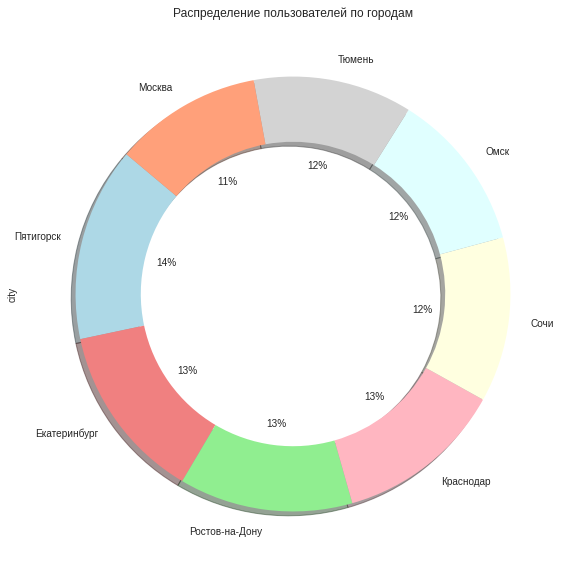

In [11]:
colors = ['lightblue', 'lightcoral', 'lightgreen', 'lightpink', 'lightyellow', 'lightcyan', 'lightgrey', 'lightsalmon']  # цветовая палитра для различных городов

data_users['city'].value_counts().plot(
    kind = 'pie', 
    y = data_users['city'].value_counts(),
    autopct = '%1.0f%%',
    figsize=(10,10), 
    title = 'Распределение пользователей по городам',
    colors = colors,  # применяем цветовую палитру
    wedgeprops=dict(width=0.3),  # делаем диаграмму "кольцевой"
    shadow=True,  # добавляем тень для 3D-эффекта
    startangle=140  # начинаем с определенного угла
)

##### Проверим распределение пользователей по типу подписки - столбец `subscription_type`

In [12]:
print("Кол-во пользователей с каждым типо подписки:")
data_users['subscription_type'].value_counts()

Кол-во пользователей с каждым типо подписки:


free     846
ultra    719
Name: subscription_type, dtype: int64

<AxesSubplot:title={'center':'Процентное соотношение пользователей в зависимости от тарифа'}, ylabel='subscription_type'>

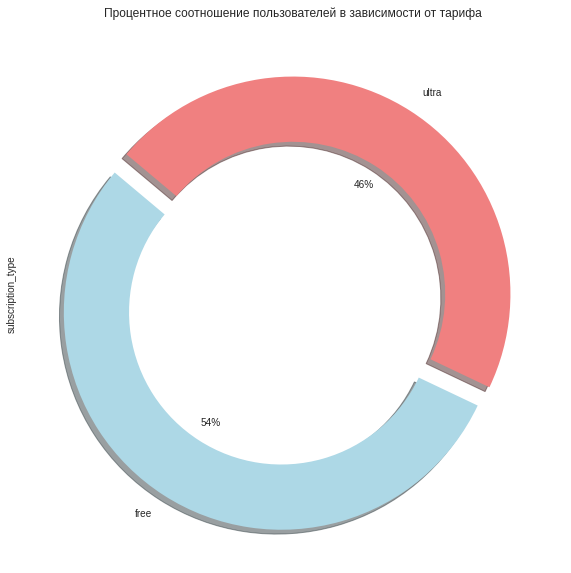

In [13]:
data_users['subscription_type'].value_counts().plot(
    kind = 'pie', 
    y = data_users['subscription_type'].value_counts(), 
    autopct = '%1.0f%%', 
    figsize=(10,10),
    title = 'Процентное соотношение пользователей в зависимости от тарифа',
    colors = ['lightblue', 'lightcoral'],  # добавляем разноцветные секторы
    wedgeprops=dict(width=0.3),  # делаем диаграмму "кольцевой"
    shadow=True,  # добавляем тень для 3D-эффекта
    startangle=140,  # начинаем с определенного угла
    explode=[0.1, 0]  # отделяем первый сектор для акцентирования внимания
)

#### 1.2.2 Данные о поездках

In [14]:
data_riders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   18068 non-null  int64  
 1   distance  18068 non-null  float64
 2   duration  18068 non-null  float64
 3   date      18068 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 564.8+ KB


In [15]:
data_riders.sample(10)

,user_id,distance,duration,date
5557,592,"3,013.44",18.23,2021-02-28
6448,693,"1,523.67",12.16,2021-11-09
17488,1494,"4,086.87",12.46,2021-02-20
10142,967,"3,847.57",16.83,2021-10-02
11230,1046,330.49,4.80,2021-08-04
1705,184,"3,071.20",10.09,2021-06-09
64,6,"3,142.27",16.57,2021-08-15
16576,1427,"3,482.85",22.50,2021-10-22
9180,900,"2,767.91",19.92,2021-01-26
15692,1368,"2,473.80",19.45,2021-09-25


##### Количество поездок у единичного пользователя, общая дистанция и время поедок.

In [16]:
data_riders['user_id'].value_counts().sort_values(ascending=False).head(10)

1236    27
1063    26
783     26
1204    24
1149    23
716     23
1531    23
1030    23
1252    22
919     22
Name: user_id, dtype: int64

In [17]:
print('Сортировка по общей дистанции поездок:')
print(data_riders.groupby(['user_id']).sum(numeric_only = True).sort_values(by='distance',ascending=False).head(5))
print('Сортировка по общей длительности поездок:')
print(data_riders.groupby(['user_id']).sum(numeric_only = True).sort_values(by='duration',ascending=False).head(5))

Сортировка по общей дистанции поездок:
         distance  duration
user_id                    
1063    79,325.85    440.53
1236    78,744.98    446.23
1361    77,773.50    408.98
1468    77,392.08    429.51
1374    74,901.67    394.42
Сортировка по общей длительности поездок:
         distance  duration
user_id                    
1236    78,744.98    446.23
1063    79,325.85    440.53
783     68,009.90    435.19
871     69,047.30    433.50
1204    72,873.75    432.15


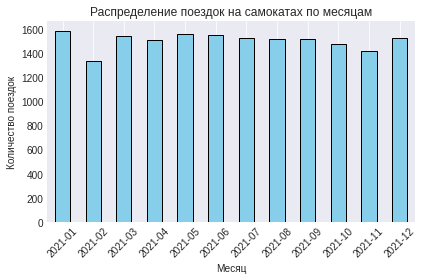

In [18]:
data_riders['date'] = pd.to_datetime(data_riders['date'])
# Группировка данных по месяцам
monthly_rides = data_riders.groupby(data_riders['date'].dt.to_period("M")).size()
# Построение графика
monthly_rides.plot(kind='bar', color='skyblue', edgecolor='black')
plt.xlabel('Месяц')
plt.ylabel('Количество поездок')
plt.title('Распределение поездок на самокатах по месяцам')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

#### Данные о подписках

In [19]:
data_sub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   subscription_type  2 non-null      object
 1   minute_price       2 non-null      int64 
 2   start_ride_price   2 non-null      int64 
 3   subscription_fee   2 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 192.0+ bytes


In [20]:
data_sub.head()

,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199


#### Вывод


* Загрузили необходимые библиотеки и три датасета:
   * Данные о клиентах
   * Записи о движениях
   * Детали о тарифах
* Распределение возраста клиентов соответствует нормальному распределению, с медианным возрастом около 25 лет.
* Возраст клиентов колеблется в диапазоне от 12 до 43 лет.
* Анализ включает в себя данные клиентов только из 8 городов:
  * Пятигорск, Екатеринбург, Ростов-на-Дону, Краснодар, Сочи, Омск, Тюмень и Москва.
* Пятигорск выделяется наибольшим числом клиентов, в то время как Москва — наименьшим.
* Однако, если смотреть в процентном соотношении, распределение клиентов по городам держится в пределах 11-14%.
* Большая часть клиентов предпочитает не приобретать платные тарифы.
* Максимальное число движений, зарегистрированное для одного клиента, равно 27.
* Самое длинное общее время движения не обязательно соответствует наибольшему общему расстоянию.
* Распределение движений по месяцам показывает примерно одинаковую активность, но январь является пиковым месяцем, а февраль — наименее загруженным.

## Шаг 2. Предобработка данных

##### Проверим пропуски в данных и заполним по необходимости

In [21]:
print('Пропусков в таблице с пользователями:' ,data_users.isna().sum().sum())
print('Пропусков в таблице с поездками:' ,data_riders.isna().sum().sum())

Пропусков в таблице с пользователями: 0
Пропусков в таблице с поездками: 0


##### Проверим дубликаты в данных и удалим по необходимости

In [22]:
print("Кол-во явных дубликатов:",data_users.duplicated().sum())

Кол-во явных дубликатов: 31


In [23]:
data_users.drop_duplicates(inplace=True)
data_users.duplicated().sum()

0

##### Изменим формат данных в столбце `date` и добавим новый столбец с месяцем.

In [24]:
data_riders['date'] = pd.to_datetime(data_riders['date'], format = '%Y-%m-%d')
data_riders['month'] = data_riders['date'].dt.month
data_riders['month'].head(10)

0     1
1     1
2     4
3     8
4     8
5    10
6    10
7    11
8    11
9    11
Name: month, dtype: int64

##### Вывод


* В таблицах отсутствуют пропущенные значения.

* У пользователей обнаружены повторы, которые были удалены.

* Отформатировали дату правильным образом и внесли дополнительный столбец month, показывающий номер месяца.

## Шаг 3. Исследовательский анализ данных

На Шагу 1 я уже составлял некоторые нужные графики и обращал внимание на максимальные и минимальные значения.\
Тем не менее, повторим необходимые действия.

##### Частота встречаемости городов

In [25]:
print(data_users['city'].value_counts())

Пятигорск         219
Екатеринбург      204
Ростов-на-Дону    198
Краснодар         193
Сочи              189
Омск              183
Тюмень            180
Москва            168
Name: city, dtype: int64


<AxesSubplot:title={'center':'Распределение пользователей по городам'}, ylabel='city'>

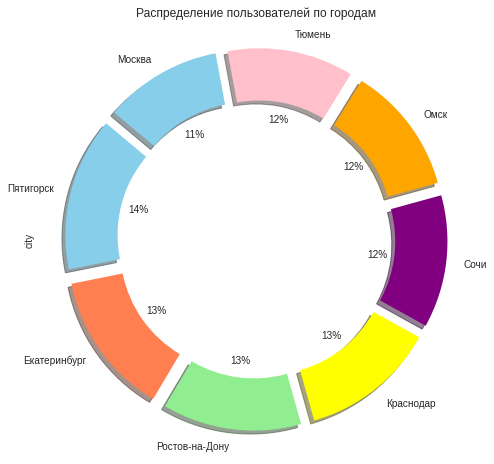

In [26]:
data_users['city'].value_counts().plot(
    kind = 'pie', 
    y = data_users['city'].value_counts(),
    autopct = '%1.0f%%',
    figsize=(8,8), 
    title = 'Распределение пользователей по городам',
    colors = ['skyblue', 'coral', 'lightgreen', 'yellow', 'purple', 'orange', 'pink'], # добавляем разноцветные секторы
    wedgeprops=dict(width=0.3), # делаем диаграмму "кольцевой"
    shadow=True, # добавляем тень для 3D-эффекта
    startangle=140, # начинаем с определенного угла
    explode=[0.1 for _ in data_users['city'].unique()] # отделяем каждый сектор для акцентирования внимания
)

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


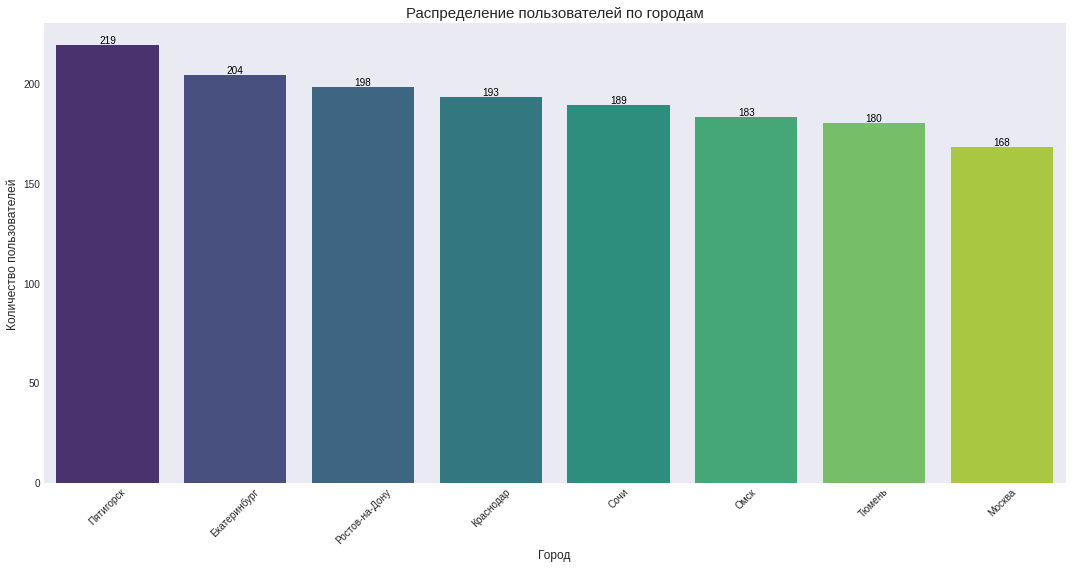

In [27]:
city_counts = data_users['city'].value_counts()

plt.figure(figsize=(15,8))
bars = sns.barplot(city_counts.index, city_counts.values, palette="viridis")

plt.title('Распределение пользователей по городам', fontsize=15)
plt.ylabel('Количество пользователей', fontsize=12)
plt.xlabel('Город', fontsize=12)
plt.xticks(rotation=45) 
plt.grid(axis='y') 

for p in bars.patches:
    bars.annotate(f'{int(p.get_height())}', 
                 (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', 
                 fontsize=10, color='black',
                 xytext=(0, 5), 
                 textcoords='offset points')

plt.tight_layout()
plt.show()


##### Соотношение пользователей с подпиской и без подписки

In [28]:
print(data_users['subscription_type'].value_counts())

free     835
ultra    699
Name: subscription_type, dtype: int64


<AxesSubplot:title={'center':'Процентное соотношение пользователей в зависимости от тарифа'}, ylabel='subscription_type'>

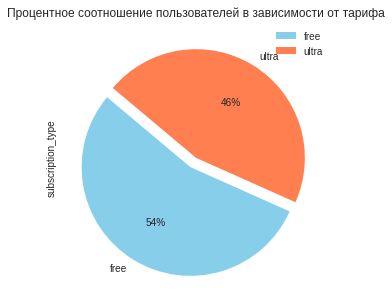

In [29]:
colors = ['skyblue', 'coral', 'gold']  # Пример цветовой палитры
explode = (0.1, 0)  # Для выделения определенного сектора (например, первого)

data_users['subscription_type'].value_counts().plot(
    kind='pie',
    y=data_users['subscription_type'].value_counts(),
    autopct='%1.0f%%',
    figsize=(5, 5),
    title='Процентное соотношение пользователей в зависимости от тарифа',
    colors=colors,
    startangle=140, 
    explode=explode,
    legend=True
)

##### Возраст пользователей

In [30]:
print('Самые младшие пользователи:')
print(data_users['age'].sort_values().head(5))
print('Самые старшие пользователи:')
print(data_users['age'].sort_values(ascending=False).head(5))

Самые младшие пользователи:
664    12
66     12
727    12
34     12
235    13
Name: age, dtype: int64
Самые старшие пользователи:
1201    43
961     39
804     38
453     38
383     38
Name: age, dtype: int64


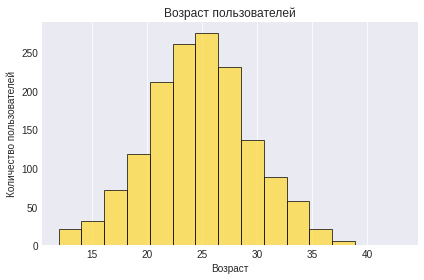

In [31]:
plt.style.use('seaborn-darkgrid')  # выбор стиля
palette = plt.get_cmap('Set2')  # выбор цветовой палитры

plt.hist(data_users['age'], bins=15, color=palette(5), edgecolor="k", alpha=0.7)  # добавляем цвет и границы бинов
plt.title('Возраст пользователей')
plt.xlabel('Возраст')
plt.ylabel('Количество пользователей')
plt.grid(axis='y')  # сетка только по вертикали
plt.tight_layout()  # автоматическая настройка размера и расположения элементов на фигуре

plt.show()

##### Расстояние, которое пользователь преодолел за одну поездку

In [32]:
print("Самые короткие дистанции за одну поездку:")
print(data_riders['distance'].sort_values().head(5))
print("Самые длинные дистанции за одну поездку:")
print(data_riders['distance'].sort_values(ascending=False).head(5))

Самые короткие дистанции за одну поездку:
11555   0.86
9541    2.57
13690   4.33
8658    6.78
7841    7.10
Name: distance, dtype: float64
Самые длинные дистанции за одну поездку:
16309   7,211.01
16484   7,066.00
15580   6,908.49
17171   6,760.94
17242   6,724.93
Name: distance, dtype: float64


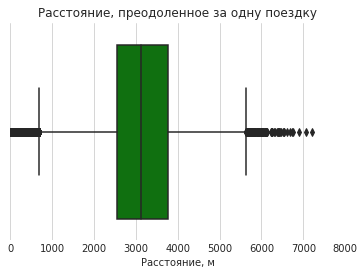

In [33]:
sns.set_style("whitegrid")  # Установить стиль "whitegrid" для улучшенной визуализации данных

sns.boxplot(x=data_riders['distance'], color='green')  # Изменим цвет на зеленый
plt.title('Расстояние, преодоленное за одну поездку')
plt.xlabel('Расстояние, м')
_ = plt.xlim(0, 8000)

##### Продолжительность поездок

In [34]:
print("Самые короткие поездки:")
print(data_riders['duration'].sort_values().head(5))
print("Самые долгие поездки:")
print(data_riders['duration'].sort_values(ascending=False).head(5))

Самые короткие поездки:
12013   0.50
17314   0.50
15029   0.50
7437    0.50
12967   0.50
Name: duration, dtype: float64
Самые долгие поездки:
4215   40.82
4709   39.87
2623   39.53
1998   38.35
6453   38.27
Name: duration, dtype: float64


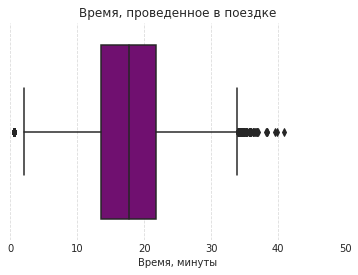

In [35]:
sns.set_style("ticks")  # Установим стиль "ticks" для лучшей визуализации данных

sns.boxplot(x = data_riders['duration'], color='purple')  # Изменим цвет на фиолетовый
plt.title('Время, проведенное в поездке')
plt.xlabel('Время, минуты')
plt.grid(axis='x', linestyle='--', alpha=0.7)  # Добавим горизонтальную сетку для лучшей читаемости данных
_ = plt.xlim(0, 50)

* Распределение пользователей по городам

  * Количество пользователей в разных городах практически одинаково, без явных выбросов. В Пятигорске насчитывается наибольшее число пользователей - 219, в то время как в Москве их всего 168.
  * Это может быть связано с размером Пятигорска, который намного меньше Москвы, делая самокаты более удобным средством передвижения в небольшом городе.
* Подписки пользователей

  * Большая часть пользователей, а именно 835 человек (примерно 54% от общего числа), предпочитают бесплатную подписку.
  * Оставшиеся 699 пользователей (приблизительно 46%) используют платную подписку.
* Демография пользователей

  * Наиболее молодыми пользователями являются те, кто в возрасте 12-13 лет.
  * Наиболее возрастной категорией являются люди в возрасте 39-43 лет.
  * Большая часть пользователей находится в возрастном диапазоне от 20 до 30 лет.
* Дистанция одной поездки

Наименьшее пройденное расстояние составляет 0.86 км.
Наибольшая пройденная дистанция равна 7.2 км.
В среднем, пользователи проезжают расстояние между 2.5 и 4 км.
* Длительность проката

  * Существуют очень короткие поездки в полминуты. Возможные причины: изменение решения или проблемы с самокатом.
  * Рекордная поездка длилась 40 минут.
  * Большинство поездок занимают от 13 до 22 минут.

## Шаг 4. Объединение данных

#### Объединим данные о пользователях, поездках и подписках в один датафрейм.

In [36]:
full_data = data_users.merge(data_riders)
full_data = full_data.merge(data_sub)
print(full_data.sample(10))

       user_id       name  age            city subscription_type  distance  \
14585     1286       Кира   21          Москва              free  4,878.42   
1732       187     Михаил   28       Пятигорск             ultra    949.96   
15451     1351      Захар   22  Ростов-на-Дону              free  2,613.19   
4051       436   Вероника   31            Омск             ultra  3,427.71   
1108       119      Макар   18    Екатеринбург             ultra  3,090.93   
7968       807  Александр   28    Екатеринбург              free  4,555.89   
6807       721     Андрей   27       Пятигорск              free  3,586.16   
15730     1372  Святослав   28       Краснодар              free  1,552.70   
10404      985    Эльмира   25    Екатеринбург              free  1,045.19   
11395     1057      Адель   26          Москва              free  3,363.09   

       duration       date  month  minute_price  start_ride_price  \
14585     18.73 2021-05-22      5             8                50   
173

In [37]:
print('Размер данных с пользователями:',data_users.shape)
print('Размер данных с поездками:',data_riders.shape)
print('Размер данных с подписками:',data_sub.shape)
print('Размер полных данных:',full_data.shape)

Размер данных с пользователями: (1534, 5)
Размер данных с поездками: (18068, 5)
Размер данных с подписками: (2, 4)
Размер полных данных: (18068, 12)


In [38]:
full_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18068 entries, 0 to 18067
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   user_id            18068 non-null  int64         
 1   name               18068 non-null  object        
 2   age                18068 non-null  int64         
 3   city               18068 non-null  object        
 4   subscription_type  18068 non-null  object        
 5   distance           18068 non-null  float64       
 6   duration           18068 non-null  float64       
 7   date               18068 non-null  datetime64[ns]
 8   month              18068 non-null  int64         
 9   minute_price       18068 non-null  int64         
 10  start_ride_price   18068 non-null  int64         
 11  subscription_fee   18068 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(6), object(3)
memory usage: 1.8+ MB


#### Создадим ещё два датафрейма из полного датафрейма:
* c данными о пользователях без подписки;
* с данными о пользователях с подпиской.

In [39]:
free_sub = full_data.query("`subscription_type` == 'free'")
ultra_sub = full_data.query("`subscription_type` == 'ultra'")

##### Визуализируем информацию о расстоянии на бесплатном тарифе

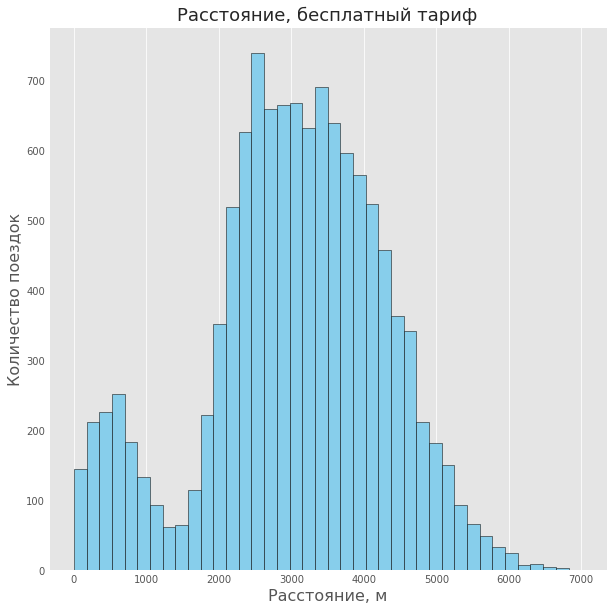

In [40]:
# Установка стиля графика
plt.style.use('ggplot')

# Установка размера графика
plt.figure(figsize=(10,10))

# Создание гистограммы с измененным цветом
plt.hist(free_sub['distance'], bins=40, range=(0, 7000), color='skyblue', edgecolor='black')

# Заголовок и метки осей
plt.title('Расстояние, бесплатный тариф', fontsize=18)
plt.xlabel('Расстояние, м', fontsize=16)
plt.ylabel('Количество поездок', fontsize=16)

# Добавление сетки на график
plt.grid(axis='y', linestyle='--', linewidth=0.7, alpha=0.7)

# Отображение графика
plt.show()

##### Визуализируем информацию о расстоянии на платном тарифе

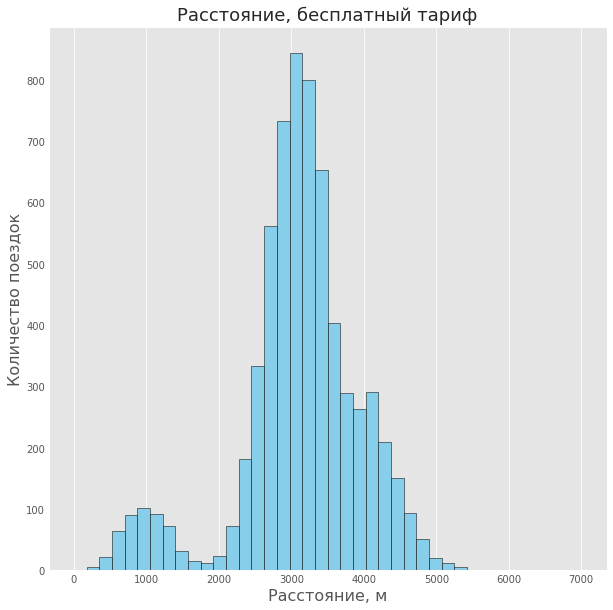

In [41]:
# Установка стиля графика
plt.style.use('ggplot')

# Установка размера графика
plt.figure(figsize=(10,10))

# Создание гистограммы с измененным цветом
plt.hist(ultra_sub['distance'], bins=40, range=(0, 7000), color='skyblue', edgecolor='black')

# Заголовок и метки осей
plt.title('Расстояние, бесплатный тариф', fontsize=18)
plt.xlabel('Расстояние, м', fontsize=16)
plt.ylabel('Количество поездок', fontsize=16)

# Добавление сетки на график
plt.grid(axis='y', linestyle='--', linewidth=0.7, alpha=0.7)

# Отображение графика
plt.show()

##### Визуализируем информацию о времени на бесплатном тарифе

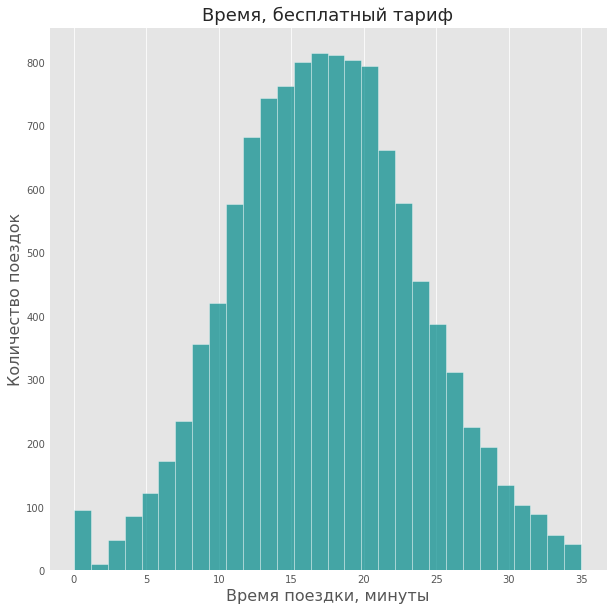

In [42]:
plt.figure(figsize=(10,10))
plt.hist(free_sub['duration'], bins=30, range = (0, 35), color='darkcyan', edgecolor='white', alpha=0.7)
plt.title('Время, бесплатный тариф', fontsize=18)
plt.xlabel('Время поездки, минуты', fontsize=16)
plt.ylabel('Количество поездок', fontsize=16)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

##### Визуализируем информацию о времени на платном тарифе

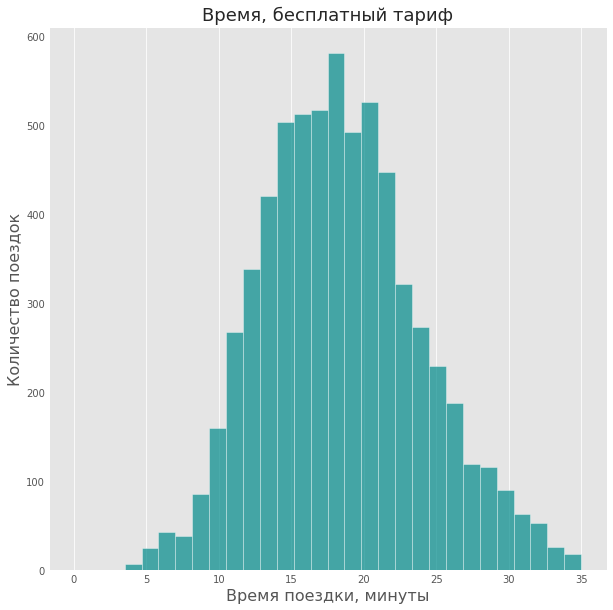

In [43]:
plt.figure(figsize=(10,10))
plt.hist(ultra_sub['duration'], bins=30, range = (0, 35), color='darkcyan', edgecolor='white', alpha=0.7)
plt.title('Время, бесплатный тариф', fontsize=18)
plt.xlabel('Время поездки, минуты', fontsize=16)
plt.ylabel('Количество поездок', fontsize=16)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

#### Вывод

* Мы объединили данные о пользователях, их поездках и тарифах в одном датафрейме, который мы назвали full_data. Затем мы разделили этот датафрейм на два: free_sub, который содержит информацию о пользователях с бесплатным тарифом, и ultra_sub, где находится информация о пользователях с платным тарифом.

* Далее мы визуализировали информацию о длительности поездок и пройденном расстоянии для каждого из тарифов. Для бесплатного тарифа средняя длительность поездки составляет от 10 до 30 минут, и пользователи проезжают от 2 до 5 километров, хотя некоторые из них даже доезжают до 6 или 6,5 километров.

* Что касается платного тарифа, то большинство пользователей укладываются в интервал от 15 до 25 минут для длительности поездки, и наибольшее количество поездок происходит на расстояние в 3 километра.

* В итоге можно сделать вывод, что пользователи с бесплатным тарифом, в среднем, совершают более длительные поездки и проезжают большее расстояние по сравнению с пользователями, выбравшими платный тариф.

## Шаг 5. Подсчёт выручки

#### Найдем суммарное расстояние, количество поeздок и суммарное время для каждого пользователя за каждый месяц



In [44]:
total_data = pd.pivot_table(full_data, index=['month', 'user_id'], values = ['distance', 'duration', 'name', 'subscription_type'],
                           aggfunc = {'distance': sum, 
                                      'duration' : sum, 
                                      'name' : len, 
                                      'subscription_type' : min})
total_data.rename(columns = {'name' : 'count_tips'}, inplace = True)
total_data['duration'] = np.ceil(total_data['duration'])
total_data.sort_values(by='month').sample(10)

,,distance,duration,count_tips,subscription_type
month,user_id,,,,
1,954,"6,394.25",38.00,2,free
3,1299,"3,422.15",18.00,1,free
8,727,"2,610.76",14.00,1,free
10,1177,"7,694.04",47.00,3,free
6,846,"10,495.07",68.00,3,free
10,698,"2,746.10",14.00,1,ultra
8,1079,"4,024.16",25.00,1,free
3,548,"3,126.55",22.00,1,ultra
12,1053,"3,328.38",15.00,1,free


#### Добавим столбец с помесячной выручкой

In [45]:
def sub_type(row):
    if row['subscription_type'] == 'ultra':
        return 6 * row['duration'] + 199
    elif row['subscription_type'] == 'free':
        return 8 * row['duration'] + 50 * row['count_tips']
    else:
        return 'Not such sub'
total_data['revenue_per_month'] = total_data.apply(sub_type, axis=1)
total_data['revenue_per_month'].sample(10)

month  user_id
7      786       428.00
8      346       289.00
4      703       252.00
10     733       266.00
1      954       404.00
4      225       361.00
8      1352      478.00
3      315       307.00
8      1384      380.00
5      1185      428.00
Name: revenue_per_month, dtype: float64

#### Вывод


* Мы создали новый набор данных, который мы называем "total_data". Этот набор данных был создан на основе другого набора данных, который мы объединили и назвали "full_data".

* Затем мы выполнили следующие операции:

* Для каждого пользователя и каждого месяца мы вычислили общее расстояние, количество совершенных поездок и общее время, проведенное в путешествиях.

* Мы также добавили новый столбец, в котором рассчитали ежемесячный доход для каждого пользователя, учитывая их тариф и информацию о поездках.

* В итоге, теперь в наборе данных "total_data" содержится собранная информация о каждом пользователе за каждый месяц, включая данные о суммарном расстоянии, количестве поездок, общем времени и выручке за данный месяц.

## Шаг 6. Проверка гипотез

### 6.1 **Важно понять, тратят ли пользователи с подпиской больше времени на поездки?**

Если да, то пользователи с подпиской могут быть «выгоднее» для компании. Проверьте гипотезу. Используйте исходные данные о продолжительности каждой сессии — отдельно для подписчиков и тех, у кого нет подписки.

Проверим гипотезу: **пользователи с подпиской тратят больше времени на поездки, чем пользователи на бесплатном тарифе.**

H_0: Время (`duration`) пользователей на подписке *ultra* = время (`duration`) пользователей на подписке *free*

H_1: Время (`duration`) пользователей на подписке *ultra* > время (`duration`) пользователей на подписке *free*

*alpha* = 0.05

In [46]:
# Исходные данные: продолжительность поездок для разных тарифов
ultra = ultra_sub['duration'] 
free = free_sub['duration']

# Тестирование гипотезы
# H0: средняя продолжительность поездок по тарифу ultra не превосходит среднюю продолжительность по тарифу free.
# H1: средняя продолжительность поездок по тарифу ultra больше, чем по тарифу free.

results = st.ttest_ind(ultra, free, alternative='greater')

# Уровень значимости
alpha = .05

# Вывод результатов
print(f"p-значение: {results.pvalue:.35f}")
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу: средняя продолжительность поездок по тарифу ultra действительно больше.')
else:
    print('Не удалось отвергнуть нулевую гипотезу.')

p-значение: 0.00000000000000000000000000000000013
Отвергаем нулевую гипотезу: средняя продолжительность поездок по тарифу ultra действительно больше.


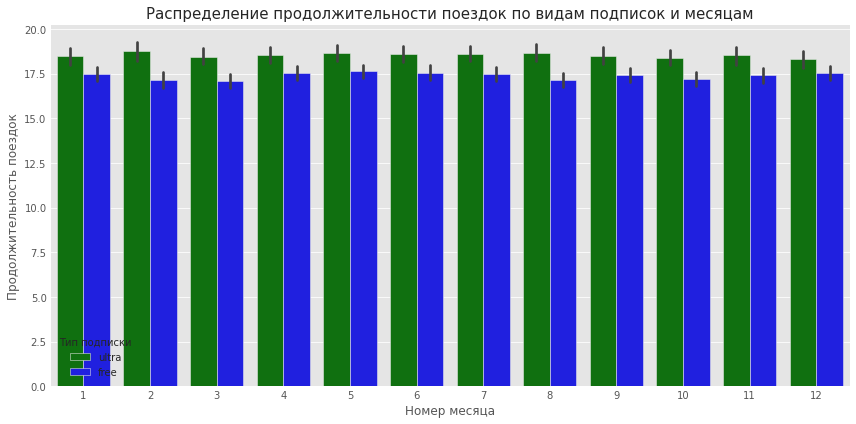

In [47]:
# Установка размера графика
plt.figure(figsize=(12, 6))

# Создание barplot
ax = sns.barplot(x='month', 
                 y='duration', 
                 hue='subscription_type', 
                 data=full_data, 
                 palette=['green', 'blue'])
# Настройка заголовка и осей
ax.set_title('Распределение продолжительности поездок по видам подписок и месяцам', fontsize=15)
ax.set_xlabel('Номер месяца', fontsize=12)
ax.set_ylabel('Продолжительность поездок', fontsize=12)
ax.legend(title='Тип подписки')
# Показать график
plt.tight_layout()
plt.show()

#### **Вывод**

Мы провели статистический анализ и проверили гипотезу о том, что время поездок пользователей на тарифе ultra равно времени поездок пользователей на тарифе free. В результате анализа было выявлено, что гипотезу о равенстве времени поездок для пользователей на разных тарифах (ultra и free) можно отвергнуть. Это означает, что существует статистически значимое различие во времени поездок между пользователями на этих двух тарифах.

### 6.2 Расстояние одной поездки в 3130 метров — оптимальное с точки зрения износа самоката. Можно ли сказать, что расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров? Проверьте гипотезу и сделайте выводы.

Проверим гипотезу: **пользователи с подпиской проезжают расстояние, не превышающее 3130 метров за одну поездку.**

H_0: Расстояние (`distance`) пользователей на подписке *ultra* < 3130 метров

H_1: Расстояние (`distance`) пользователей на подписке *ultra* > 3130 метров

*alpha* = 0.05

In [48]:
interested_value = 3130.0
u_distance = ultra_sub['distance']
# Задаём уровень значимости
alpha = .05

# Выполняем одновыборочный t-тест для проверки гипотезы о среднем значении
results = st.ttest_1samp(
    u_distance, 
    interested_value,
    alternative='greater')
    
# Выводим p-value
print(f"p-value: {results.pvalue:.10f}")

# Проверяем гипотезу на основе p-value и заданного уровня значимости
if (results.pvalue < alpha):
    print('Отвергаем нулевую гипотезу: среднее значение меньше указанного')
else:
    print('Не удалось отвергнуть нулевую гипотезу: среднее значение не меньше указанного')

p-value: 0.9195368848
Не удалось отвергнуть нулевую гипотезу: среднее значение не меньше указанного


#### **Вывод**


Мы провели статистический анализ и не смогли отвергнуть нулевую гипотезу о том, что расстояние, которое проехали пользователи на тарифе ultra, не превышает 3130 метров. Это означает, что наши данные не обеспечивают достаточно убедительных доказательств в пользу того, что пользователи тарифа ultra всегда не превышают указанное значение расстояния.

### 6.3 Проверьте гипотезу о том, будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки. Сделайте вывод.

Проверим гипотезу: **помесячная выручка от пользователей с подпиской выше, чем выручка от пользователей без подписки.**\
H_0: Выручка (`revenue_per_month`) пользователей на подписке **ultra** = выручка (`revenue_per_month`) пользователей на подписке **free**

H_1: Выручка (`revenue_per_month`) пользователей на подписке **ultra** > выручка (`revenue_per_month`) пользователей на подписке **free**

*alpha* = 0.05

In [49]:
ultra_per_mnth = total_data.loc[total_data.subscription_type == 'ultra', 'revenue_per_month']
free_per_mnth = total_data.loc[total_data.subscription_type == 'free', 'revenue_per_month']

# Выполняем двухвыборочный t-тест для сравнения средних значений выручки между двумя группами
results = st.ttest_ind(ultra_per_mnth, 
                       free_per_mnth,
                       alternative='greater')

# Задаём уровень значимости
alpha = .05

# Выводим p-value
#print(f"p-value: {results.pvalue:.40f}")

print('p-value', results.pvalue) #Код ревьюера

# Проверяем гипотезу на основе p-value и заданного уровня значимости
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу: средняя выручка по подписке "ultra" больше, чем по "free"')
else:
    print('Не удалось отвергнуть нулевую гипотезу: средняя выручка по подписке "ultra" не обязательно больше, чем по "free"')

p-value 2.8130926188487286e-35
Отвергаем нулевую гипотезу: средняя выручка по подписке "ultra" больше, чем по "free"


#### **Вывод**

Проверка гипотезы о том, что доход от пользователей с тарифом "ultra" больше, чем от тех, кто использует тариф "free", не является непосредственным выводом о разнице в доходе между этими двумя группами пользователей. Гипотеза о разнице в доходе между тарифами может быть проверена статистически, например, с использованием t-теста или анализа дисперсии.

Если результаты статистического анализа покажут, что разница в доходе между пользователями с тарифами "ultra" и "free" статистически значима, то тогда можно будет сделать вывод о том, что доход от пользователей с тарифом "ultra" действительно больше. Однако для этого нужно провести анализ и удостовериться, что различие не является случайным.

### 6.4 Представьте такую ситуацию: 
техническая команда сервиса обновила сервера, с которыми взаимодействует мобильное приложение. Она надеется, что из-за этого количество обращений в техподдержку значимо снизилось. Некоторый файл содержит для каждого пользователя данные о количестве обращений до обновления и после него. **Какой тест вам понадобился бы для проверки этой гипотезы?**

#### Вывод:

Применим предположение о том, что средние значения для связанных выборок равны.

Гипотезы представлены следующим образом:

H0 : μ1 = μ2 \
H1 : μ1 ≠ μ2 \
Здесь μ1 и μ2 обозначают средние показатели обращений в службу поддержки до и после внесенных изменений.

Для анализа следует применить метод: scipy.stats.ttest_rel().

### Шаг 7. Итоговый вывод

Провели анализ данных:

Распределение пользователей по городам примерно равномерное, с Пятигорском на первом месте (219 пользователей) и Москвой на последнем (168 пользователей).
Большинство, или 54%, выбирают бесплатную подписку, остальные 46% платят за подписку.
Большая часть пользователей находится в возрасте от 20 до 30 лет.
Среднее расстояние поездки - от 2.5 до 4 км, длительность - 13-22 минуты.
Далее, объединили всю информацию в одну таблицу и на ее основе создали еще две: для платных и бесплатных пользователей.

Визуализация показала:

На бесплатном тарифе люди в пути от 10 до 30 минут и проезжают 2-6,5 км.
На платном тарифе, в основном, путешествуют 15-25 минут, а максимальное расстояние - 3 км.
Сформировали датафрейм total_data, отображающий суммарные показатели по каждому пользователю за месяц и добавили столбец с выручкой.

По итогам проверки гипотез:

Подписчики проводят в пути больше времени, чем те, кто использует бесплатный тариф.
Пользователи с платной подпиской, как правило, проезжают не более 3130 метров за раз.
Ежемесячная выручка от платных пользователей превышает доход от тех, кто пользуется бесплатной версией.
